# 4

## 4.a
<br>
<font size=4>
Planck function:
$$B_\lambda(\lambda,T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}$$</font>

## 4.b
<br>
<font size=4> 
$$
\begin{eqnarray}
&&\frac{dB_{\lambda}}{d\lambda}=0  \\
\Leftrightarrow &&\frac{-5}{\lambda}B_\lambda+B_\lambda\frac{\frac{hc}{{\lambda^2}k_BT}e^{\frac{hc}{\lambda k_BT}}}{e^{\frac{hc}{\lambda k_BT}}-1}=0\\
\Leftrightarrow&&(-5)\cdot(e^{\frac{hc}{\lambda k_BT}}-1)+\frac{hc}{\lambda k_BT}e^{\frac{hc}{k_B (\lambda T)}}=0\\
make\ x=\frac{hc}{\lambda k_BT}&& ,we\ have:\frac{xe^x}{e^x-1}-5=0: \\ 
\end{eqnarray}
$$
<br>
solve this equation and we can get: $$\lambda T=constant$$
</font>

## 4.c




# 2


In [2]:
from astropy.io import fits 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 




#import fits data
stars_fits=fits.open('gaia_all100pc-result.fits')
data=stars_fits[1].data

bprp_raw=data['bp_rp']
b_div_err=data['phot_bp_mean_flux_over_error']
r_div_err=data['phot_rp_mean_flux_over_error']
Gmag_raw=data['phot_g_mean_mag']
flux_div_err=data['phot_g_mean_flux_over_error']
plx=data['parallax']
plx_err=data['parallax_error']
astroerror=data['astrometric_excess_noise']


#delate bp-rp==nan
bprp=[]
bprp_err=[]
Gmag_abs=[]
Gabs_err=[]
for each in range(len(Gmag_raw)):
    if(math.isnan(bprp_raw[each])==False and astroerror[each]<1):
        Gmag_abs.append(Gmag_raw[each]-10+5*np.log10(plx[each]))
        gmag_err=2.5/flux_div_err[each]
        Gabs_err.append(np.power(gmag_err**2+25*(plx_err[each]/plx[each])**2,0.5))
        bprp.append(bprp_raw[each])
        b_error=2.5/b_div_err[each]
        r_error=2.5/r_div_err[each]
        bprp_err.append(np.power(b_error**2+r_error**2,0.5))
  
      
## color: true:-2.5 --- 6.5     cut:-1.5 --- 5.5
## Gmag:  true: -3   --- 27     cut:-1 --- 19


step=0.02
G_min=-1
G_max=19
BR_min=-1.5
BR_max=5.5
number=np.zeros([int((G_max-G_min)/step),int((BR_max-BR_min)/step)])  
for each in range(len(bprp)):
    if G_min<Gmag_abs[each]<G_max and BR_min<bprp[each]<BR_max:
        indexi=math.floor((Gmag_abs[each]-G_min)/step)
        indexj=math.floor((bprp[each]-BR_min)/step)
        number[indexi][indexj]=number[indexi][indexj]+1  

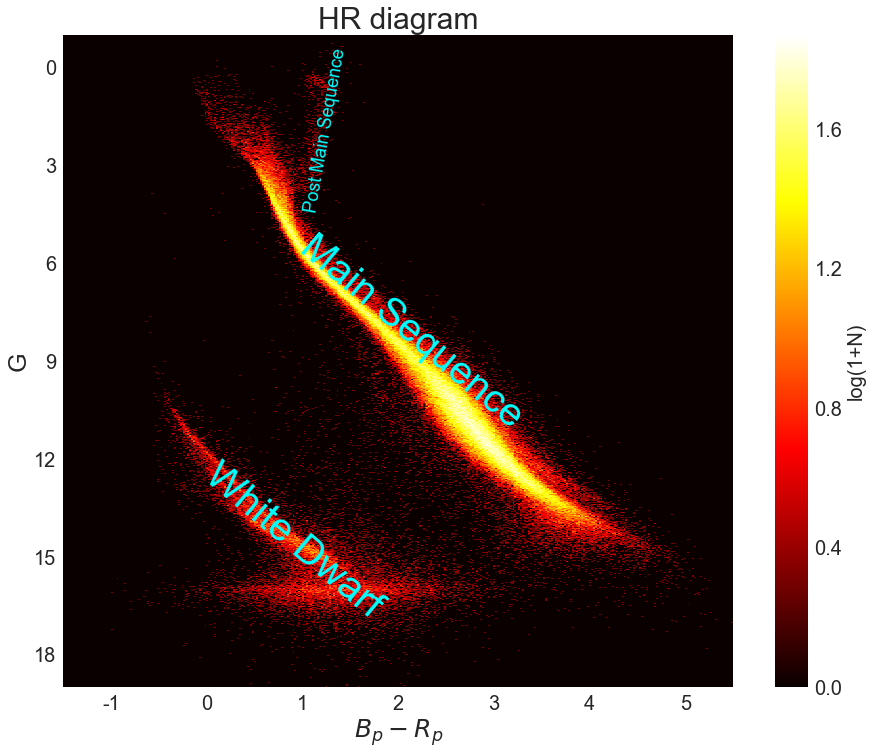

In [3]:
import seaborn as sns   
####seaborn will change the default parameters of plt!!!!!!!!!!!!!

plt.figure(figsize=(15,12))
ax=sns.heatmap(np.log10(number+1),cmap='hot',cbar_kws={'label':'log(1+Number)'})
plt.xticks(range(int(0.5/step),int((BR_max-BR_min-0.5)/step)+1,int(1/step)),range(-1,6,1),rotation=0,fontsize=20)
plt.yticks(range(int((G_max-G_min)/step)-int(1/step),int(1/step)-1,-int(3/step)),range(0,19,3),rotation=0,fontsize=20)
plt.xlabel('$B_{p}-R_{p}$',fontsize=25)
plt.ylabel('G',fontsize=25)
plt.title('HR diagram',fontsize=30)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('log(1+N)',fontsize=20)

plt.annotate('Main Sequence',(120,660),size=40,color='cyan',rotation=320)
plt.annotate('White Dwarf',(70,310),size=40,color='cyan',rotation=320)
plt.annotate('Post Main Sequence',(125,960),size=18,color='cyan',rotation=80)

plt.savefig('HR_diagram.png',format='png')
plt.show()


In [37]:
##add noise
Gmag_abs_withnoise=[]
bprp_withnoise=[]
for each in range(len(Gmag_abs)):
    Gmag_abs_withnoise.append(Gmag_abs[each]+np.random.normal(loc=0,scale=Gabs_err[each]))
    bprp_withnoise.append(bprp[each]+np.random.normal(loc=0,scale=bprp_err[each]))
    

    
step=0.02
G_min=-1
G_max=19
BR_min=-1.5
BR_max=5.5
number=np.zeros([int((G_max-G_min)/step),int((BR_max-BR_min)/step)])  
for each in range(len(bprp)):
    if G_min<Gmag_abs_withnoise[each]<G_max and BR_min<bprp_withnoise[each]<BR_max:
        indexi=math.floor((Gmag_abs_withnoise[each]-G_min)/step)
        indexj=math.floor((bprp_withnoise[each]-BR_min)/step)
        number[indexi][indexj]=number[indexi][indexj]+1  

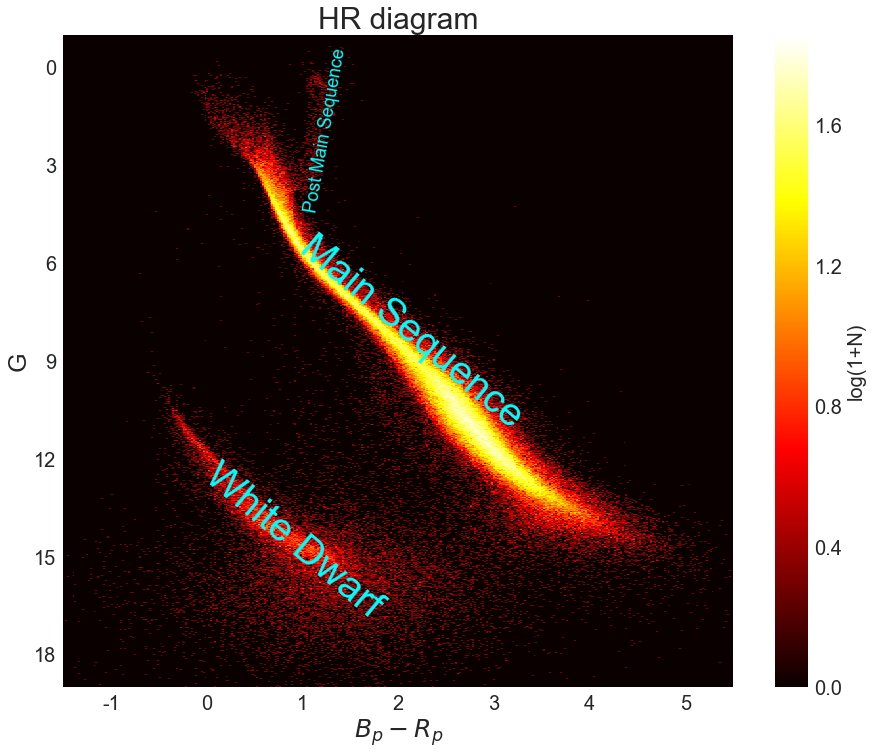

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(np.log10(number+1),cmap='hot',cbar_kws={'label':'log(1+Number)'})
plt.xticks(range(int(0.5/step),int((BR_max-BR_min-0.5)/step)+1,int(1/step)),range(-1,6,1),rotation=0,fontsize=20)
plt.yticks(range(int((G_max-G_min)/step)-int(1/step),int(1/step)-1,-int(3/step)),range(0,19,3),rotation=0,fontsize=20)
plt.xlabel('$B_{p}-R_{p}$',fontsize=25)
plt.ylabel('G',fontsize=25)
plt.title('HR diagram',fontsize=30)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
cax.set_ylabel('log(1+N)',fontsize=20)

plt.annotate('Main Sequence',(120,660),size=40,color='cyan',rotation=320)
plt.annotate('White Dwarf',(70,310),size=40,color='cyan',rotation=320)
plt.annotate('Post Main Sequence',(125,960),size=18,color='cyan',rotation=80)
plt.savefig('HR_diagram_withnoise.png',format='png')

plt.show()